# This notebook goes through the discretization implementation 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [46]:
n_obs_bins = [40, 10]
obs_val_bins = [np.linspace(h[0], h[1], n_obs_bins[i]) for i, h in
                     enumerate(zip([0, 0], [2, 100]))]
n_states = np.prod(n_obs_bins)

In [47]:
np.e ** np.log(3)

3.0

In [48]:
n_obs_bins[0]

40

In [51]:
np.logspace(math.log(0.11, np.e ** (-0.7)), math.log(3, np.e ** (-0.7)), n_obs_bins[0], base=np.e ** (-0.7))

array([0.11      , 0.1197309 , 0.13032262, 0.14185131, 0.15439986,
       0.16805849, 0.1829254 , 0.19910747, 0.21672106, 0.23589279,
       0.2567605 , 0.27947423, 0.30419728, 0.33110739, 0.36039805,
       0.39227983, 0.42698197, 0.46475395, 0.50586734, 0.55061773,
       0.59932687, 0.65234494, 0.71005314, 0.77286636, 0.84123621,
       0.91565424, 0.99665549, 1.08482233, 1.18078865, 1.28524441,
       1.39894061, 1.52269468, 1.65739637, 1.80401414, 1.96360211,
       2.13730766, 2.32637968, 2.53217752, 2.75618079, 3.        ])

In [52]:
# log of w space

# obs_val_bins = [np.linspace(0.1, 3, n_obs_bins[0]) ,np.flip(np.logspace(0, 20, base=0.9, num=n_obs_bins[1]) * 100)]

# log of lambda space

obs_val_bins = [np.logspace(np.log(0.11), np.log(3), n_obs_bins[0], base=np.e) ,np.flip(np.logspace(0, 20, base=0.9, num=n_obs_bins[1]) * 100)]

In [63]:
0.9 ** 2

0.81

In [53]:
def _cell_to_ind(digits):
    return digits[0] * n_obs_bins[1] + digits[1]

def _ind_to_cell(number):
    i = int(number / (n_obs_bins[1]))
    j = int(number % (n_obs_bins[1]))
    #j = int(number - i * n_obs_bins[1])
    return i, j

def observation(observation):
    # converts continuous observation to comply with discretized bin
    digits = [np.digitize([x], bins, right=True)[0]
              for x, bins in zip(observation.flatten(), obs_val_bins)]
    digits = [np.minimum(digit, n_obs_bins[i]-1) for i, digit in enumerate(digits)]
    return _cell_to_ind(digits)

def _ind_to_cont(ind):
    i, j = _ind_to_cell(ind)
    return obs_val_bins[0][i], obs_val_bins[1][j]

def snap_to_grid_coord(obs):
    digits = [np.digitize([x], bins, right=True)[0]
              for x, bins in zip(obs.flatten(), obs_val_bins)]
    return digits

def snap_to_grid(obs):
    digits = [np.digitize([x], bins, right=True)[0]
              for x, bins in zip(obs.flatten(), obs_val_bins)]
    return np.array([obs_val_bins[0][digits[0]], obs_val_bins[1][digits[1]]])

In [54]:
max_obs = np.array([1, 5])
min_obs = np.array([0, 0])

In [55]:
ind = observation(max_obs)
ind

270

In [56]:
n_states

400

In [57]:
x = np.zeros(n_states)
y = np.zeros(n_states)
for i in range(n_states):
    x[i],y[i] = _ind_to_cont(i)

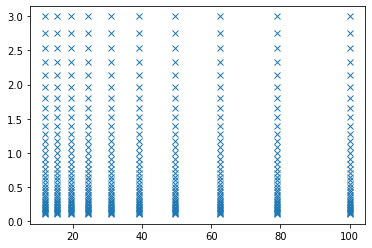

In [58]:
plt.plot(y,x, 'x')

In [59]:
obs_val_bins[0]

array([0.11      , 0.1197309 , 0.13032262, 0.14185131, 0.15439986,
       0.16805849, 0.1829254 , 0.19910747, 0.21672106, 0.23589279,
       0.2567605 , 0.27947423, 0.30419728, 0.33110739, 0.36039805,
       0.39227983, 0.42698197, 0.46475395, 0.50586734, 0.55061773,
       0.59932687, 0.65234494, 0.71005314, 0.77286636, 0.84123621,
       0.91565424, 0.99665549, 1.08482233, 1.18078865, 1.28524441,
       1.39894061, 1.52269468, 1.65739637, 1.80401414, 1.96360211,
       2.13730766, 2.32637968, 2.53217752, 2.75618079, 3.        ])

In [11]:
obs_val_bins[1]

array([ 12.15766546,  13.58363391,  15.17685371,  16.95694172,
        18.94581564,  21.16796391,  23.6507472 ,  26.4247353 ,
        29.52408351,  32.98695322,  36.85598175,  41.17880731,
        46.00865561,  51.40499518,  57.43426958,  64.17071553,
        71.69727692,  80.10662615,  89.50230508, 100.        ])

In [31]:
import sys
sys.path.append('../..')
sys.path.append('..')
from collections_env.discwrapper import DiscretizedObservationWrapper, DiscretizedActionWrapper
from collections_env.gymcollectionsenv import CollectionsEnv

In [32]:
env = CollectionsEnv()
denv = DiscretizedObservationWrapper(env, n_bins=n_obs_bins)

In [33]:
denv.observation(max_obs)

40

In [34]:
denva = DiscretizedActionWrapper(denv)

In [35]:
denva.action(2)

0.0666775173611111

In [36]:
denva._aind_to_cell(0)

0.0

In [37]:
ob = denva.step(0)

In [42]:
ob[0]

39

In [43]:
_ind_to_cell(ob[0])

(1, 19)

In [39]:
np.product([bin.shape[0] for bin in obs_val_bins])

400

In [70]:
number = 0
np.digitize(number, obs_val_bins[0])

1

In [30]:
obs_val_bins[0][10]

5.0

In [31]:
number = 100
np.digitize(number, obs_val_bins[1], right=True)

100

In [32]:
_ind_to_cell(1000)

(9, 0)

Alternative

In [38]:
n_bins = 100
val_bins = [np.linspace(h[0], h[1], n_obs_bins[i] + 1) for i, h in enumerate(zip([0, 0], [5, 100]))]
def _convert_to_one_number(digits):
    return sum([d * ((n_bins + 1) ** i) for i, d in enumerate(digits)])

def observation(observation):
    digits = [np.digitize([x], bins)[0]
              for x, bins in zip(observation.flatten(), val_bins)]
    return _convert_to_one_number(digits)


In [47]:
ob = np.array([5, 100])

In [45]:
observation(ob)

10202